<a href="https://colab.research.google.com/github/wisevirus/Altair-Project/blob/master/Emmanuel_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELEMENTS OF STATISTICS AND ECONOMETRICS.
## ASSIGNEMENT 4.


In [0]:
#Importing libraries
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.float_format = '{:.7f}'.format
%matplotlib inline
warnings.filterwarnings('ignore')
# Load in the r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'


In [0]:
%%R
install.packages("caret")
install.packages("tree")

install.packages("rpart")
install.packages("RColorBrewer")

install.packages("rattle")
install.packages('rpart.plot') 

In this problem we use the same data set on service usage of 1000 clients of a telecommunication company as in Assignment 3. The variable **tenure** is taken as the dependent variable and the remaining variables as explanatory.


In [57]:
# Loading the dataset
telco_df = pd.read_csv('https://gist.githubusercontent.com/wisevirus/2fd98c11d33b481efabc173c0e34d759/raw/6439684dec6dcec9c0cdd7d3377c9958b87485ba/telco.csv', index_col=0)

#Transfoming the columns of the dataframe to numaric values
telco_df['post_undergraduate_degree'] = (telco_df.ed == 'Post-undergraduate degree').astype(np.int)
telco_df['high_school'] = (telco_df.ed == 'High school degree').astype(np.int)
telco_df['college_degree'] = (telco_df.ed == 'College degree').astype(np.int)
telco_df['some_college'] = (telco_df.ed == 'Some college').astype(np.int)
telco_df['marital'] = (telco_df.marital == 'Married').astype(np.int)
telco_df['gender'] = (telco_df.gender == 'Male').astype(np.int)
telco_df['retire'] = (telco_df.retire == 'Yes').astype(np.int)
telco_df['churn'] = (telco_df.churn == 'Yes').astype(np.int)
telco_df.drop('ed', axis=1, inplace=True)

#Printing the transformed dataframe
print('Transformed Telco:')
display(telco_df.head(10))

print('\n')
print('Summary:')
display(telco_df.describe())

#Standardizing my inputs
from sklearn.preprocessing import StandardScaler
SMethod = StandardScaler()
telco_df[telco_df.columns] = SMethod.fit_transform(telco_df)


#Defining the dependant and the independent variables
dependant_variable = 'tenure'
independent_variables = ['college_degree', 'post_undergraduate_degree','age', 'marital', 'address', 'income',
                         'employ','retire', 'gender','longmon', 'wiremon', 'churn', 'some_college','high_school']

y = telco_df[dependant_variable]
X = telco_df[independent_variables]

Transformed Telco:


,tenure,age,marital,address,income,employ,retire,gender,longmon,wiremon,churn,post_undergraduate_degree,high_school,college_degree,some_college
index,,,,,,,,,,,,,,,
1,13,44,1,9,64,5,0,1,3.7000000,0.0000000,1,0,0,1,0
2,11,33,1,7,136,5,0,1,4.4000000,35.7000000,1,1,0,0,0
3,68,52,1,24,116,29,0,0,18.1500000,0.0000000,0,0,0,0,0
4,33,33,0,12,33,0,0,0,9.4500000,0.0000000,1,0,1,0,0
5,23,30,1,9,30,2,0,1,6.3000000,0.0000000,0,0,0,0,0
6,41,39,0,17,78,16,0,0,11.8000000,0.0000000,0,0,1,0,0
7,45,22,1,2,19,4,0,0,10.9000000,0.0000000,1,0,1,0,0
8,38,35,0,5,76,10,0,1,6.0500000,64.9000000,0,0,1,0,0
9,45,59,1,7,166,31,0,1,9.7500000,0.0000000,0,0,0,1,0




Summary:


,tenure,age,marital,address,income,employ,retire,gender,longmon,wiremon,churn,post_undergraduate_degree,high_school,college_degree,some_college
count,1000.0000000,1000.0000000,1000.0000000,1000.0000000,1000.0000000,1000.0000000,1000.0000000,1000.0000000,1000.0000000,1000.0000000,1000.0000000,1000.0000000,1000.0000000,1000.0000000,1000.0000000
mean,35.5260000,41.6840000,0.4950000,11.5510000,77.5350000,10.9870000,0.0470000,0.4830000,11.7231000,11.5839000,0.2740000,0.0660000,0.2870000,0.2340000,0.2090000
std,21.3598119,12.5588163,0.5002252,10.0866813,107.0441648,10.0820871,0.2117447,0.4999610,10.3634863,19.7194256,0.4462321,0.2484063,0.4525879,0.4235840,0.4067978
min,1.0000000,18.0000000,0.0000000,0.0000000,9.0000000,0.0000000,0.0000000,0.0000000,0.9000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,17.0000000,32.0000000,0.0000000,3.0000000,29.0000000,3.0000000,0.0000000,0.0000000,5.2000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
50%,34.0000000,40.0000000,0.0000000,9.0000000,47.0000000,8.0000000,0.0000000,0.0000000,8.5250000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
75%,54.0000000,51.0000000,1.0000000,18.0000000,83.0000000,17.0000000,0.0000000,1.0000000,14.4125000,24.7125000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000
max,72.0000000,77.0000000,1.0000000,55.0000000,1668.0000000,47.0000000,1.0000000,1.0000000,99.9500000,111.9500000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000


**1.** The lasso regression is an alternative approach to variable selection.

**(a)** Explain in your own words the idea of the lasso regression. Sketch a situation when a simple linear regression fails, but the lasso regression still can be estimated

**Solution**

The goal of the lasso regression is to do the estimation and feature selection in one step(this is done by penalization term $\lambda \sum_{j=1}^{J}|\beta_j|$ added to OLS procedure). Lasso regression is useful when sample size is not much larger than number of input parameters, that implies general high variability.
Thus it fundamental aim is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero.

**(b)** For the usual regression model the variables are rarely normalized/standardized.
However, in the case of the lasso regression the scaling becomes crucial. Why?
Scale your data by $(x_i − \bar{x})/ \hat{\sigma}_x$ . Can/should the binary variables be scaled in the
same fashion? How would you handle the variable **ed**?

**Solution**

With lasso regression, to have good feature selection one must have all his $\beta$'s of equal importance or relanvance to the model. Therefore we have to standardize or normalize all the variables  before fitting it to the model, and binary variables can also be normalized but in this we will lose the ecomomic interpretation of the variables. 

**(c)** Run a lasso regression for data with $\lambda > 0$. Plot the estimated parameters
as functions of $\lambda$. Which value of $\lambda$ would you recommend? If it is easy to implement, then determine the optimal $\lambda$ by cross-validation.

**Solution**

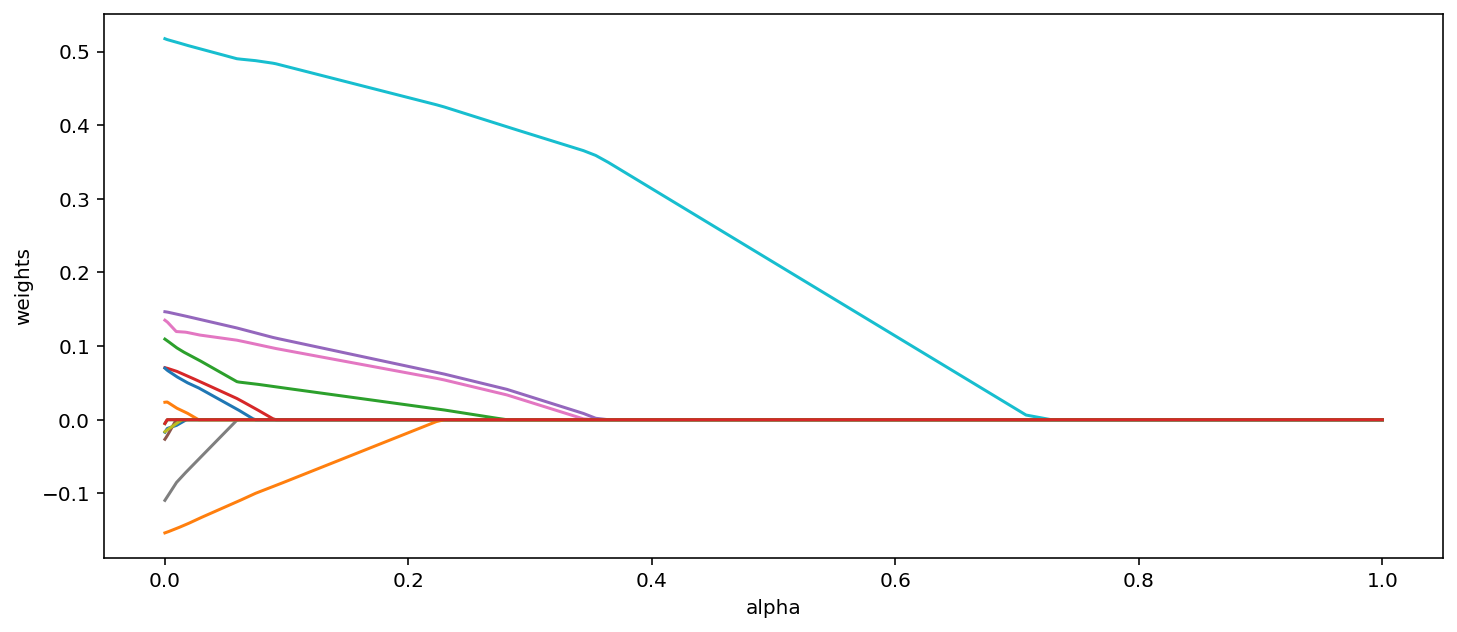

In [62]:
from sklearn.linear_model import Lasso, LassoCV

lasso = Lasso(max_iter= 10000)
coefs = []
alphas = 10**np.linspace(-5,0,num=400)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
#Plotting the estimated parameters
plt.figure(figsize=(12,5))
plt.plot(alphas, coefs)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [23]:
# 5-fold cross-validation
lassocv = LassoCV(alphas = alphas, max_iter = 100000, normalize = True)
lassocv.fit(X, y)
print(f'The best estimated value of alpha is {lassocv.alpha_}')

The best estimated value of alpha is 0.0004509572135676144


**2.** A nonlinear regression offers a flexible technique for modelling complex relationships.
We wish to explain the tenure by the long distance calls per month longmon.

**(a)** Make a bivariate scatter plot and estimate an appropriate linear (!) model. Add
the regression line to the plot.


**Solution:** 

Now assuming the model is as follows: $$\text{tenure} = \beta_0 + \beta_1  \text{longmon} + u$$

                            OLS Regression Results                            
Dep. Variable:                 tenure   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     1036.
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          1.78e-156
Time:                        13:18:32   Log-Likelihood:                -1062.9
No. Observations:                1000   AIC:                             2130.
Df Residuals:                     998   BIC:                             2140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.631e-16      0.022  -7.35e-15      1.0

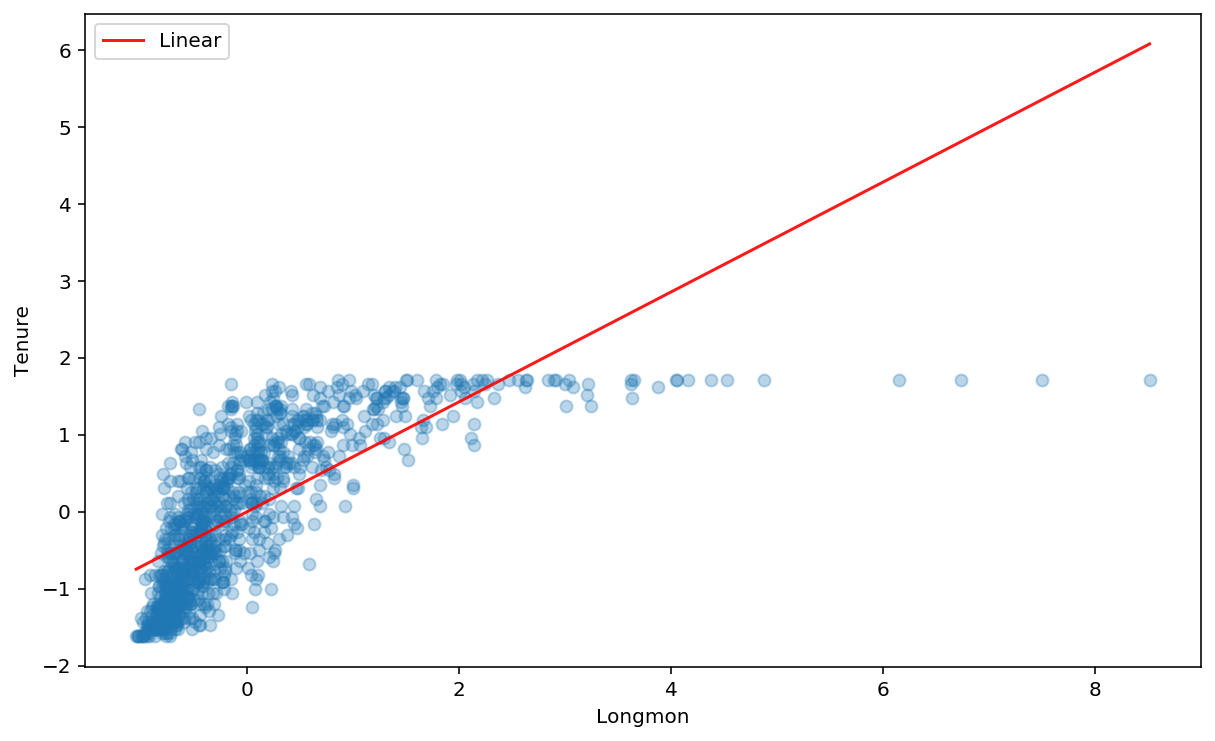

In [24]:
est = sm.OLS(y, sm.add_constant(X['longmon'])).fit()
print(est.summary())

longmon_ = np.linspace(X.longmon.min(), X.longmon.max(), 100)
yhat_linear = est.predict(sm.add_constant(longmon_))
#Plotting the output
plt.figure(figsize=(10,6))
plt.scatter(X.longmon, y, alpha=0.3) # Plot the raw data
plt.xlabel("Longmon")
plt.ylabel("Tenure")
plt.plot(longmon_, yhat_linear, 'r', alpha=0.9, label="Linear") 
plt.legend()
plt.show()

**(b)** Estimate now an appropriate nonlinear regression which might fit the data better.
Add the regression curve to the plot and compare (quantitatively) the fit with

**Solution:** 

Fitting a nonlinear model $$\text{tenure} = \beta_0 - \beta_1  e^{-\beta_2 \text{longmon}} + u$$ which can better fit
 the data.

Estimated B's: [1.73051404 1.36744756 0.91603398]


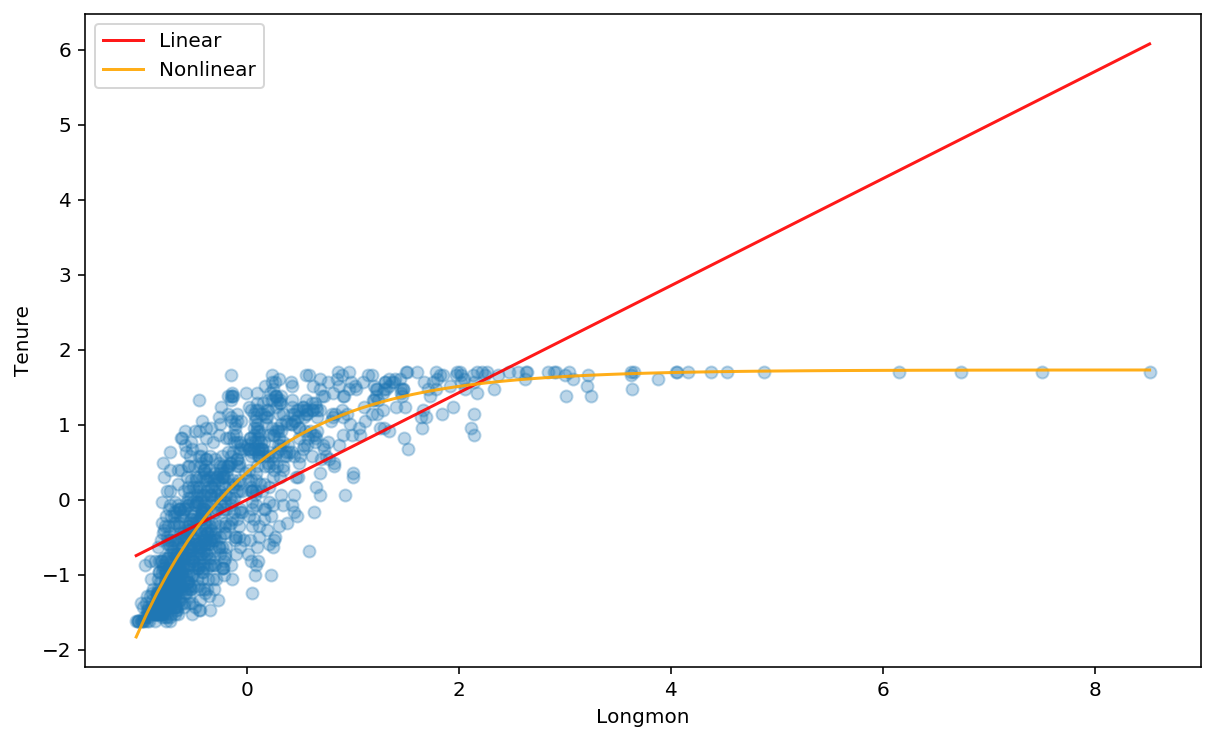

In [26]:
from scipy.optimize import least_squares
from sklearn.metrics import r2_score


def model(x, input):
    return x[0] - x[1]*np.exp(-x[2]*input)

def function_to_minimize(beta, x, y):
    return (beta[0] - beta[1] * np.exp(-beta[2] * x)) - y


res_lsq = least_squares(function_to_minimize, x0 = [20, 5, 0.1], args=(X.longmon,y))
print("Estimated B's:", res_lsq.x)
yhat_non_linear = model(res_lsq.x, longmon_)

plt.figure(figsize=(10,6))
plt.scatter(X.longmon, y, alpha=0.3) # Plot the raw data
plt.xlabel("Longmon")
plt.ylabel("Tenure")
plt.plot(longmon_, yhat_linear, 'r', alpha=0.9, label="Linear") 
plt.plot(longmon_, yhat_non_linear, color='orange', alpha=0.9, label="Nonlinear") 
plt.legend()
plt.show()

**(c)** 
Explain in your own words, why all the classical tests and inferences are not directly applicable to the NLS estimators.

**Solution:**

Because $\hat{\beta}$ is not linear related to the residuals $u_k$, classical tests and inferences will only be valid asymptotically.But with an increase in sample size,the estimated parameters will converge to the true parameters.



**(d)**
 What kind of problems might arise if we decide to fit a non-linear regression using
all explanatory variables?



**Solution**

It will be computationally resource intensive thing to do and  having too much  parameters compared to observations may lead to overfitting of the model however we alot of adjustments methods than can be used to correct for the over fitting. 

**3.**Next we model the relationship between tenure and address using the nonparametric
Nadaraya-Watson regression.

**(a)** An important calibration parameter of a nonparametric regression is the band-
width. Explain what happens with the regression/the weights in the Nadaraya-
Watson regression if the bandwidth is too high or too small.

**Solution**


When the bandwidth is too high , the density function is oversmoothed thus will depart from histogram and when the bandwidth is too small, then the estimator will be too volotile and the density function will be undersmoothed and consequently it will take into account too many observations.


**(b)**Fit a Nadaraya-Watson regression with Gaussian kernel and “optimal” bandwidth
to the longmon/address data. Check and explain how the “optimal bandwidth”
is determined in your software. Compare the (in-sample) fit of the nonparametric
regression and the nonlinear regression in the previous subproblem.

**Solution**

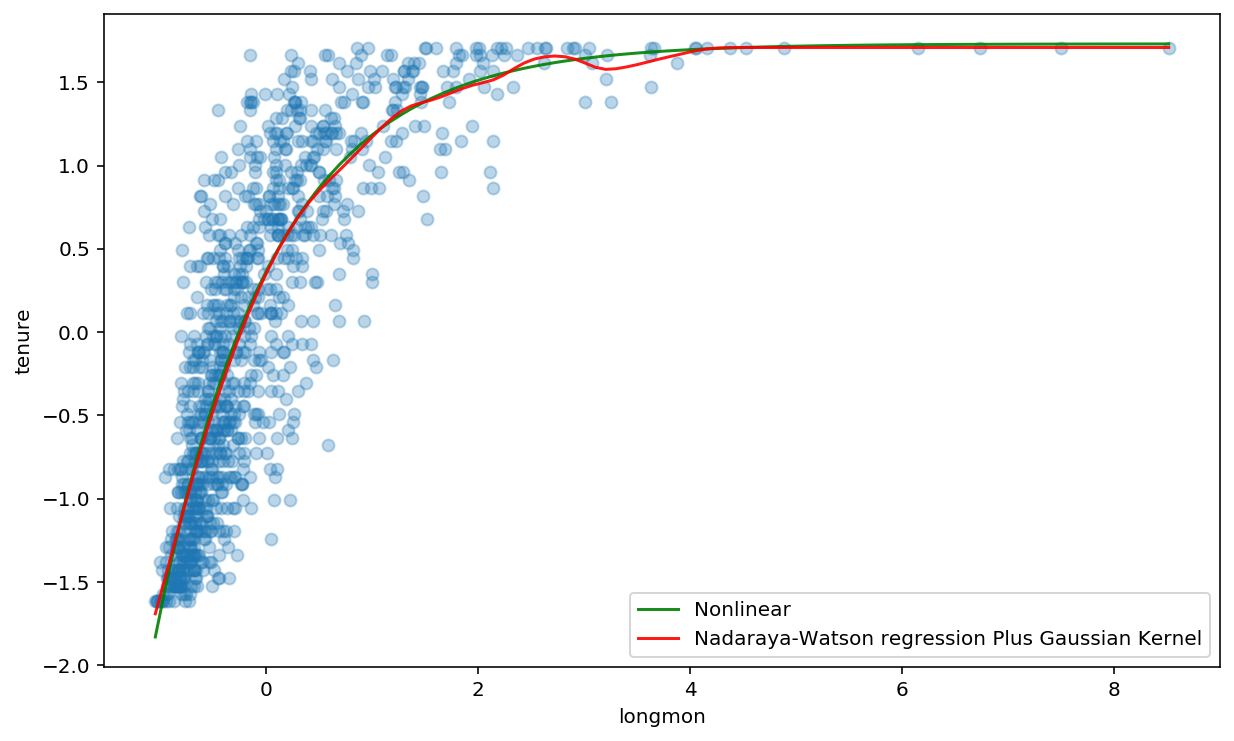

In [63]:
from statsmodels.nonparametric.kernel_regression import KernelReg
kernelRegression = KernelReg(y, X.longmon, var_type='c')

yhat_kernelRegression, _ = kernelRegression.fit(longmon_)
plt.figure(figsize=(10,6))
plt.scatter(X.longmon, y, alpha=0.3)
plt.xlabel("longmon")
plt.ylabel("tenure")
plt.plot(longmon_, yhat_non_linear, color='green', alpha=0.9, label="Nonlinear") 
plt.plot(longmon_, yhat_kernelRegression, color='red', alpha=0.9, label="Nadaraya-Watson regression Plus Gaussian Kernel") 
plt.legend()
plt.show()

**4**

Next we consider classification of the clients using the churn variable as the dependent
variable and the logistic regression.

**(a)** Fit a logistic regression to explain churn by the remaining explanatory variables.


**Solution**

In [0]:
%%R
telco_df_r <- read.csv('https://gist.githubusercontent.com/wisevirus/2fd98c11d33b481efabc173c0e34d759/raw/6439684dec6dcec9c0cdd7d3377c9958b87485ba/telco.csv')


In [30]:
%%R
logit <- glm(churn ~ ., data=telco_df_r, family=binomial(logit))
summary(logit)


Call:
glm(formula = churn ~ ., family = binomial(logit), data = telco_df_r)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7523  -0.7836  -0.4361   0.8926   2.6774  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     8.248e-01  4.093e-01   2.015  0.04392 *  
index                           3.343e-04  2.778e-04   1.203  0.22885    
tenure                         -3.134e-02  7.077e-03  -4.429 9.47e-06 ***
age                             8.362e-05  1.091e-02   0.008  0.99388    
maritalUnmarried               -4.049e-02  1.637e-01  -0.247  0.80458    
address                        -1.477e-02  1.283e-02  -1.151  0.24974    
income                          4.766e-04  1.047e-03   0.455  0.64895    
edDid not complete high school -8.041e-01  2.712e-01  -2.966  0.00302 ** 
edHigh school degree           -5.550e-01  2.239e-01  -2.479  0.01316 *  
edPost-undergraduate degree     1.617e-01  3.174e-01  

**(b)** Consider the explanatory variable tenure. Obviously its parameter cannot be interpreted in the same way as for a linear regression. Provide the correct interpretation using the parameter and using odds.


**Solution**

As we can see, the tenure is significant and the estimated parameter value -3.134e-02. Its an indication that an  increase in tenure will decrease the probability of churn. The longer you have used the telephone service, the lower the probability of terminating your contract last month.

$$
e^{-3.134e-02} = \frac
{P(Y=1| \text{tenure + 1})/P(Y=0| tenure + 1)}
{P(Y=1| \text{tenure })/P(Y=0| tenure)} = 0.969146
$$
Therefore the  probability of terminating your contract last month will decrease by approximately 3% if your tenure increases by 1%.

**(c)** Run a stepwise model selection using AIC as criterion. Further consider only the optimal model chosen
here. From the final model, which of the variables do increase the probability of churn and which variables decrease this probability? Is this consistent with economic intuition?

From the output:

- longmon     -0.038900 -> decreases the probability of churn, the more long-distance call you make, the less likely you will terminate your contract
- wiremon      0.019812  ->  increases probability of churn, thus if you are using internet you can also communicate using text messages.
- tenure  -0.033095 ->  decreases the probability of churn, the longer you are using the services the less likely you might terminate your contract.
- employ      -0.040762 -> decreases the probability of churn, the longer you are employed the more contacts you have, the higher demand on phone  

In [31]:
%%R
step(logit, direction ="backward")

Start:  AIC=989.27
churn ~ index + tenure + age + marital + address + income + ed + 
    employ + retire + gender + longmon + wiremon

          Df Deviance     AIC
- age      1   957.27  987.27
- marital  1   957.33  987.33
- gender   1   957.41  987.41
- income   1   957.46  987.46
- retire   1   958.14  988.14
- address  1   958.60  988.60
- index    1   958.72  988.72
<none>         957.27  989.27
- longmon  1   960.81  990.81
- employ   1   961.51  991.51
- ed       4   970.21  994.21
- wiremon  1   967.48  997.48
- tenure   1   977.48 1007.48

Step:  AIC=987.27
churn ~ index + tenure + marital + address + income + ed + employ + 
    retire + gender + longmon + wiremon

          Df Deviance     AIC
- marital  1   957.33  985.33
- gender   1   957.41  985.41
- income   1   957.46  985.46
- retire   1   958.24  986.24
- index    1   958.72  986.72
- address  1   958.97  986.97
<none>         957.27  987.27
- longmon  1   960.82  988.82
- employ   1   962.63  990.63
- ed       4   9

In [32]:
%%R
logit_opt = glm(formula = churn ~ tenure + employ + longmon + wiremon, family = binomial(logit), data = telco_df_r)
summary(logit_opt)


Call:
glm(formula = churn ~ tenure + employ + longmon + wiremon, family = binomial(logit), 
    data = telco_df_r)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6212  -0.7964  -0.4547   0.9599   2.7353  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.525167   0.152756   3.438 0.000586 ***
tenure      -0.033095   0.006752  -4.902  9.5e-07 ***
employ      -0.040762   0.011076  -3.680 0.000233 ***
longmon     -0.038900   0.020996  -1.853 0.063916 .  
wiremon      0.019812   0.003991   4.964  6.9e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1174.39  on 999  degrees of freedom
Residual deviance:  976.55  on 995  degrees of freedom
AIC: 986.55

Number of Fisher Scoring iterations: 5



**(d)** Randomly pick up five clients. Determine their probabilities of leaving the company. Provide for the first of them the formula which may be used to compute this probability with inserted values of parameters and variables. If you want to predict the membership in one of the two groups for a particular client, what is the simplest way to proceed using these probabilities?


the probability of the first customer leaving the company can be computed using following formula:
$$ 
\hat{P(Y_0 = 1|X_0)} = \hat{\pi}_0 = \frac{1}{1 + e^{-\hat{b}_0 - \hat{b}_1 X_{10} - ... - \hat{b}_k X_{k0}}}
$$
where $\hat{b_i}$ are the estimated parameter values and $X_{k0}$ is the feature vector.

**Solution**

In [34]:
np.random.seed(5)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

independent_variables = telco_df[[ 'longmon', 'wiremon','tenure', 'employ',]]
churn = telco_df['churn'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(independent_variables, churn, test_size=0.1, random_state=42)

clf = LogisticRegression().fit(X_train, y_train)

five_random_clients = X_test.sample(n=5)
five_random_clients

,longmon,wiremon,tenure,employ
index,,,,
663,-0.8228278,-0.5877299,-1.5235282,-1.0902998
622,-0.8035196,-0.5877299,-0.8209234,1.3905863
925,-0.3932208,-0.5877299,-0.1651590,1.2913508
903,-0.1277333,-0.5877299,0.8653280,-0.7925935
293,-0.0939440,-0.5877299,-0.2588396,-0.8918289


Let's use formula above to compute probability of the first customer leaving the company and compare it with the value produced by a classifier. 

In [36]:
print('Computed by classifier: ', clf.predict_proba(X_test.iloc[:1, :])[0, 1])
print('Conputed using the formula:', 1 / (1 + np.exp(-clf.intercept_ - clf.coef_ @ X_test.iloc[0])).item())

Computed by classifier:  0.1218572427052215
Conputed using the formula: 0.1218572427052215


_**(e)**_ Compute the classification table and calculate the specificity and sensitivity. Provide verbal interpretation for the elements of the classification table and the performance measures.


**Solution**

The classification table shows a comparison of the number of successes (y = 1) predicted by the logistic regression model compared to the number actually observed and similarly the number of failures (y = 0) predicted by the logistic regression model compared to the number actually observed.
Now the fraction of correctly classified 1-values among all true 1-objects.
$$Sensitivity = \frac{TP}{TP + FN}$$

and the fraction of correctly classified 0-values among all true 0-objects.
$$Specificity = \frac{TN}{FP + TN}$$



Based on computed _sensitivity_ and _specificity_ we may conclude that our model pretty well predicts the probability of staying in the company, however it cannot to identify customers that may leave the company.

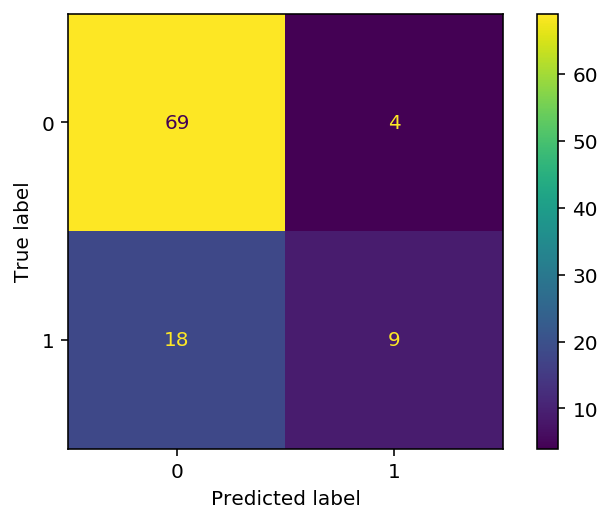

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix

TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity = TP / (TP + FN)
specificity = TN / (FP + TN)

print("sensitivity: ", sensitivity)
print("specificity: ", specificity)

sensitivity:  0.3333333333333333
specificity:  0.9452054794520548


**_(f)_** To improve the performance it makes sense to change the threshold used for classification. This can be done using the ROC curve. Plot this curve and determine the optimal threshold.*italicized text*

**Solution**

As we are seeking for the point near  to the perfect point(sensitivity = 1,specificity = 1), the optimal treshold is 0.3.

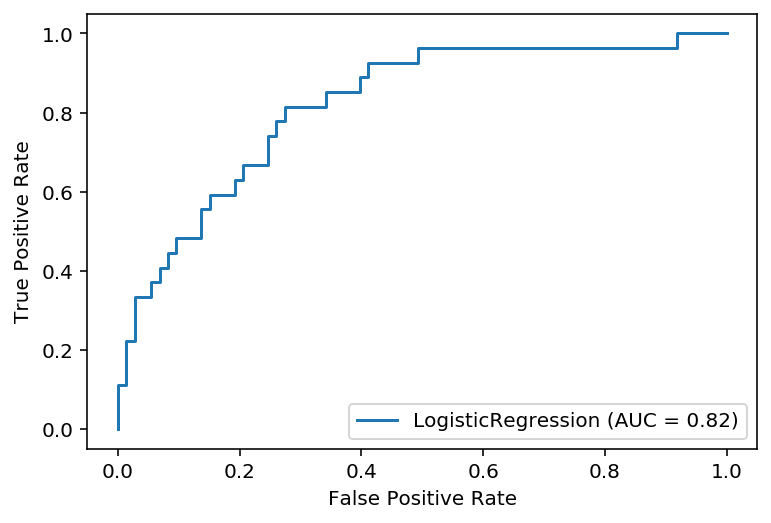

In [44]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)

_**(g)**_ Recompute the classification table, sensitivity and specificity for the new threshold. Provide interpretation of the obtained values. Compare the results with the original values. Is the procedure now more strict/conservative?

**Solution**

Improving our sensitivity value while our specificity value reduces means that as our accuracy of predicting the potential customers that are likely to leave the company is get higher,it is very likely  we will classify some customers as customers that have the tendency to leave the company while in reality it is not so. 

In [49]:
proba = clf.predict_proba(X_test)[:, 1]
new_y_pred = proba > 0.3

new_confusion_matrix = confusion_matrix(y_test, new_y_pred)
print('Recomputed Classification Table:', new_confusion_matrix)

TP = new_confusion_matrix[1, 1]
TN = new_confusion_matrix[0, 0]
FP = new_confusion_matrix[0, 1]
FN = new_confusion_matrix[1, 0]

sensitivity = TP / (TP + FN)
specificity = TN / (FP + TN)
print("Recomputed Sensitivity: ", sensitivity)
print("Recomputed Specificity: ", specificity)

Recomputed Classification Table: [[55 18]
 [ 8 19]]
Recomputed Sensitivity:  0.7037037037037037
Recomputed Specificity:  0.7534246575342466


**5.**In the next step we model tenure using regression trees.


**(a)** Assume the first variable to be used for splitting is **longmon**. Write down the corresponding optimization problem and explain how the optimization works.


**Solution**

The optimization problem is
$$\sum_{p=1}^{P}\sum_{i \in R_p}(y_i-\hat{y}_{R_p})^2 \rightarrow min \quad w.r.t \quad R_1, ... , R_p$$
where $P$ is a number of rectangles, $R_p$ points within a rectangle, $\hat{y}_{R_p}$ is the mean of observarions.

$R_1, ... , R_p$ are non continuous variables which we want to minimize, therefore the recursive binary splitting method is implemented and  the main idea is to recursively choose the splitting point in such a way that the sum of variances of points falling in the two different sides is  small as we it can be.

**(b)** Obviously you can get very long trees. Tree prunning helps to get trees of a reasonable size. Fit a CART to the data and prune it to have at most 10 splits. What is the value of the corresponding complexity parameter? Check you software for the implementation of the prunning, particularly the form of the loss function.

**Solution**

The complexity parameter for 10 splits is 0.0054305. What it does it to determine a nested sequence of subtrees of the supplied rpart object by recursively snipping off the least important splits, based on the complexity parameter.

In [53]:
%%R
library("rpart")
library("tree")

rpart.telco = rpart(tenure ~ .,data=telco_df_r,control=rpart.control(cp = 0.001))
tree.telco = tree(tenure ~ longmon + income, data=telco_df_r)
printcp(rpart.telco)


Regression tree:
rpart(formula = tenure ~ ., data = telco_df_r, control = rpart.control(cp = 0.001))

Variables actually used in tree construction:
 [1] address age     churn   ed      employ  gender  income  index   longmon
[10] marital wiremon

Root node error: 455785/1000 = 455.79

n= 1000 

          CP nsplit rel error  xerror     xstd
1  0.5598394      0   1.00000 1.00181 0.027819
2  0.0744033      1   0.44016 0.44305 0.018104
3  0.0609266      2   0.36576 0.37473 0.016750
4  0.0181119      3   0.30483 0.32033 0.014814
5  0.0094438      4   0.28672 0.30233 0.013940
6  0.0080382      5   0.27727 0.30329 0.013907
7  0.0075983      6   0.26924 0.30136 0.013582
8  0.0067448      7   0.26164 0.29794 0.013460
9  0.0065242      8   0.25489 0.29631 0.013518
10 0.0054305      9   0.24837 0.29445 0.013709
11 0.0044392     10   0.24294 0.28335 0.013654
12 0.0042472     12   0.23406 0.28321 0.013512
13 0.0031340     13   0.22981 0.28184 0.013489
14 0.0028643     14   0.22668 0.27832 0.01367

Call:
rpart(formula = tenure ~ ., data = telco_df_r, control = rpart.control(cp = 0.001))
  n= 1000 

            CP nsplit rel error    xerror       xstd
1  0.559839431      0 1.0000000 1.0018099 0.02781916
2  0.074403315      1 0.4401606 0.4430512 0.01810407
3  0.060926645      2 0.3657573 0.3747310 0.01675004
4  0.018111898      3 0.3048306 0.3203327 0.01481380
5  0.009443769      4 0.2867187 0.3023297 0.01393998
6  0.008038178      5 0.2772749 0.3032944 0.01390693
7  0.007598341      6 0.2692368 0.3013598 0.01358161
8  0.006744769      7 0.2616384 0.2979383 0.01346044
9  0.006524152      8 0.2548937 0.2963107 0.01351778
10 0.005430504      9 0.2483695 0.2944530 0.01370936
11 0.005430500     10 0.2429390 0.2833522 0.01365418

Variable importance
longmon address  employ     age  income wiremon   churn 
     51      14      13      10       8       3       1 

Node number 1: 1000 observations,    complexity param=0.5598394
  mean=35.526, MSE=455.7853 
  left son=2 (565 obs) right son=

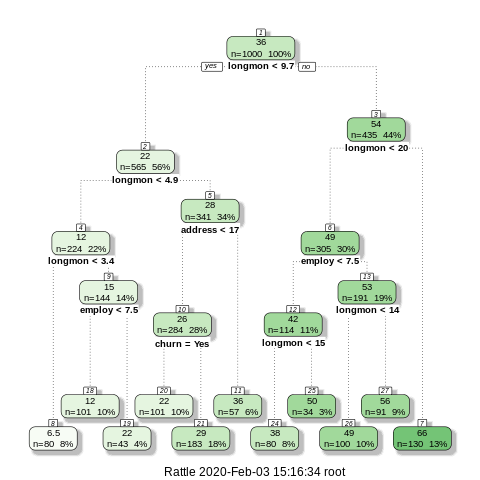

In [54]:
%%R
library("RColorBrewer")
library("caret")
library("tree")
library("rpart")
library("rattle")
#Selecting the complexity parameter value that corresponds to number of splits equal to 10
rpart.telco.prunned = prune(rpart.telco, cp = 0.0054305)
fancyRpartPlot(rpart.telco.prunned)
summary(rpart.telco.prunned)

**(c)** Check the value of the improvement in the first split. Explain the idea of improvement and provide numerical expression how this improvement is computed
for the first split.

**Solution**

Improvement percentage/Reduction percentage in the mean-squared error (MSE) before the split and after the split:
$$
Improvement = \frac{MSE_1 \cdot K_1 - [MSE_2 \cdot K_2 + MSE_3 \cdot K_3]}{MSE_1 \cdot K_1} 
$$



In [56]:
#Summary: longmon < 9.725  to the left,  improve=0.5598394
print("Improvement after the first split is:", (455.7853 * 1000 - (199.3614 * 565 + 435 * 202.2518)) / (455.7853* 1000))

Improvement after the first split is: 0.559839415619591


**(d)** Compare the in-sample fit of the tree to the in-sample fit of the lasso regression above. Compare the importance of the variables for the two models. In the case of the lasso regression the importance is mirrored by the parameters if the variables are standardized.

**Solution**

In the case of  lasso regression it is important to have equal scale  for all the parameters, to make all the parameters of the same relevance to the model.